In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CS506Project_smallbusiness/20220516-MainStreet_BusinessList.csv')

In [ ]:
for i in range(df.shape[0]):
  if df.at[i,'NAICS_2017_2digit_desc'] == 'Retail Trade':
    df.at[i,'business_classes'] = df.at[i,'NAICS_2017_6digit_desc']
  elif df.at[i,'NAICS_2017_2digit_desc'] == 'Other Services':
    df.at[i,'business_classes'] = df.at[i,'NAICS_2017_6digit_desc']
  else:
    df.at[i,'business_classes'] = df.at[i,'NAICS_2017_2digit_desc']

In [ ]:
for i in range(df.shape[0]):
  if df.at[i,'NAICS_2017_2digit_desc'] == 'Retail Trade':
    df.at[i,'business_label'] = 1
  elif df.at[i,'NAICS_2017_2digit_desc'] == 'Other Services':
    df.at[i,'business_label'] = 1
  else:
    df.at[i,'business_label'] = 0

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
all_business = df['NAICS_2017_2digit_desc'].unique()

In [ ]:
import geopandas as gpd
import folium
#read geojson file
data = gpd.read_file('/content/drive/MyDrive/CS506Project_smallbusiness/City_Council_Districts_View.geojson')
#get the district data
dis1 = data.loc[data['DISTRICT'] == 1]
dis2 = data.loc[data['DISTRICT'] == 2]
dis3 = data.loc[data['DISTRICT'] == 3]
dis4 = data.loc[data['DISTRICT'] == 4]
dis5 = data.loc[data['DISTRICT'] == 5]
dis6 = data.loc[data['DISTRICT'] == 6]
dis7 = data.loc[data['DISTRICT'] == 7]
dis8 = data.loc[data['DISTRICT'] == 8]
dis9 = data.loc[data['DISTRICT'] == 9]
#Convert Geopandas Multipolygon to Polygon
dis1_e = dis1.explode()
dis2_e = dis2.explode()
dis3_e = dis3.explode()
dis3_e = dis3_e.iloc[[3]]
dis4_e = dis4.explode()
dis5_e = dis5.explode()
dis6_e = dis6.explode()
dis7_e = dis7.explode()
dis8_e = dis8.explode()
dis9_e = dis9.explode()

<ipython-input-46-397288f45dbb>:16: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  dis1_e = dis1.explode()
<ipython-input-46-397288f45dbb>:17: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  dis2_e = dis2.explode()
<ipython-input-46-397288f45dbb>:18: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  dis3_e = dis3.explode()
<ipython-input-46-397288f45dbb>:20: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consisten

In [ ]:
dis3_e

,,OBJECTID_1,OBJECTID,DISTRICT,Shape_STAr,Shape_STLe,Councilor,Webpage,Bio,Image,GlobalID,CreationDate,Creator,EditDate,Editor,SHAPE_Length,SHAPE_Area,geometry
4,3,5,5,3,1.639291e+08,161426.282011,Frank Baker,https://www.boston.gov/departments/city-council,https://bit.ly/2fwazZO,https://boston.maps.arcgis.com/sharing/rest/co...,{47E03F60-3443-4933-94E2-80DECD57D1C5},2018-03-05 15:35:07+00:00,143525_boston,2020-07-13 18:39:03+00:00,BostonGIS,0.515261,0.001663,"POLYGON ((-71.06242 42.26756, -71.06253 42.267..."


In [ ]:
dis1style = {'fillColor': 'blue', 'color': 'blue'}
dis2style = {'fillColor': 'red', 'color': 'red'}
dis3style = {'fillColor': 'yellow', 'color': 'yellow'}
dis4style = {'fillColor': 'green', 'color': 'green'}
dis5style = {'fillColor': 'orange', 'color': 'orange'}
dis6style = {'fillColor': 'brown', 'color': 'brown'}
dis7style = {'fillColor': 'gray', 'color': 'gray'}
dis8style = {'fillColor': 'navy', 'color': 'navy'}
dis9style = {'fillColor': 'purple', 'color': 'purple'}


map_1=folium.Map(location=[42.364506, -71.038887],zoom_start=12)
folium.GeoJson(data=dis1["geometry"],style_function=lambda x:dis1style).add_to(map_1)
folium.GeoJson(data=dis2["geometry"],style_function=lambda x:dis2style).add_to(map_1)
folium.GeoJson(data=dis3["geometry"],style_function=lambda x:dis3style).add_to(map_1)
folium.GeoJson(data=dis4["geometry"],style_function=lambda x:dis4style).add_to(map_1)
folium.GeoJson(data=dis5["geometry"],style_function=lambda x:dis5style).add_to(map_1)
folium.GeoJson(data=dis6["geometry"],style_function=lambda x:dis6style).add_to(map_1)
folium.GeoJson(data=dis7["geometry"],style_function=lambda x:dis7style).add_to(map_1)
folium.GeoJson(data=dis8["geometry"],style_function=lambda x:dis8style).add_to(map_1)
folium.GeoJson(data=dis9["geometry"],style_function=lambda x:dis9style).add_to(map_1)
map_1

In [ ]:
from shapely.geometry import Point

#get location in districts
df['District'] = ""

districts = []
for lon,lat in zip(df['longitude'], df['latitude']):
    pt = Point(lon, lat)
    if pt.within(dis1_e['geometry'].values[0]):
      districts.append(1)
    elif pt.within(dis2_e['geometry'].values[0]):
      districts.append(2)
    elif pt.within(dis3_e['geometry'].values[0]):
      districts.append(3)
    elif pt.within(dis4_e['geometry'].values[0]):
      districts.append(4)
    elif pt.within(dis5_e['geometry'].values[0]):
      districts.append(5)
    elif pt.within(dis6_e['geometry'].values[0]):
      districts.append(6)
    elif pt.within(dis7_e['geometry'].values[0]):
      districts.append(7)
    elif pt.within(dis8_e['geometry'].values[0]):
      districts.append(8)
    elif pt.within(dis9_e['geometry'].values[0]):
      districts.append(9)
    else:
      districts.append(0)

# update values in the that column, values: True/False
df['District'] = districts
df_within1 = df[df['District'] == 1]
df_within2 = df[df['District'] == 2]
df_within3 = df[df['District'] == 3]
df_within4 = df[df['District'] == 4]
df_within5 = df[df['District'] == 5]
df_within6 = df[df['District'] == 6]
df_within7 = df[df['District'] == 7]
df_within8 = df[df['District'] == 8]
df_within9 = df[df['District'] == 9]
#df_within4 = df_within4.reset_index(drop=True)

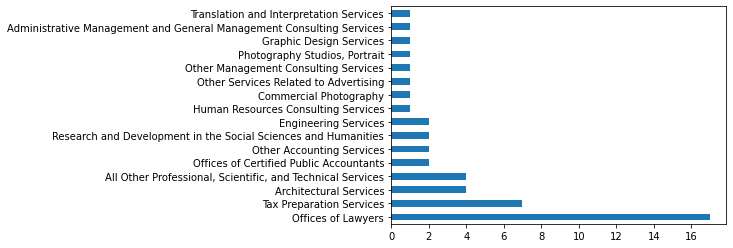

In [ ]:
def get_ts(df):
  df_ts = df[df['NAICS_2017_2digit_desc'] == 'Professional, Scientific, and Technical Services']
  return df_ts['NAICS_2017_6digit_desc'].value_counts().plot(kind='barh')

get_ts(df_within5)
# df_1_ts = df_within1[df_within1['NAICS_2017_2digit_desc'] == 'Professional, Scientific, and Technical Services']
# df_1_ts['NAICS_2017_6digit_desc'].value_counts().plot(kind='barh')

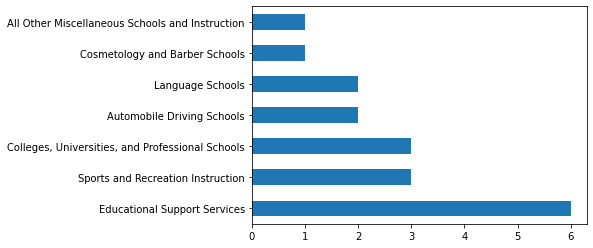

In [ ]:
def get_ed(df):
  df_ts = df[df['NAICS_2017_2digit_desc'] == 'Educational Services']
  return df_ts['NAICS_2017_6digit_desc'].value_counts().plot(kind='barh')

get_ed(df_within2)

<ipython-input-52-552517562548>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['counts'] = 1


Text(0, 0.5, 'Business counts')

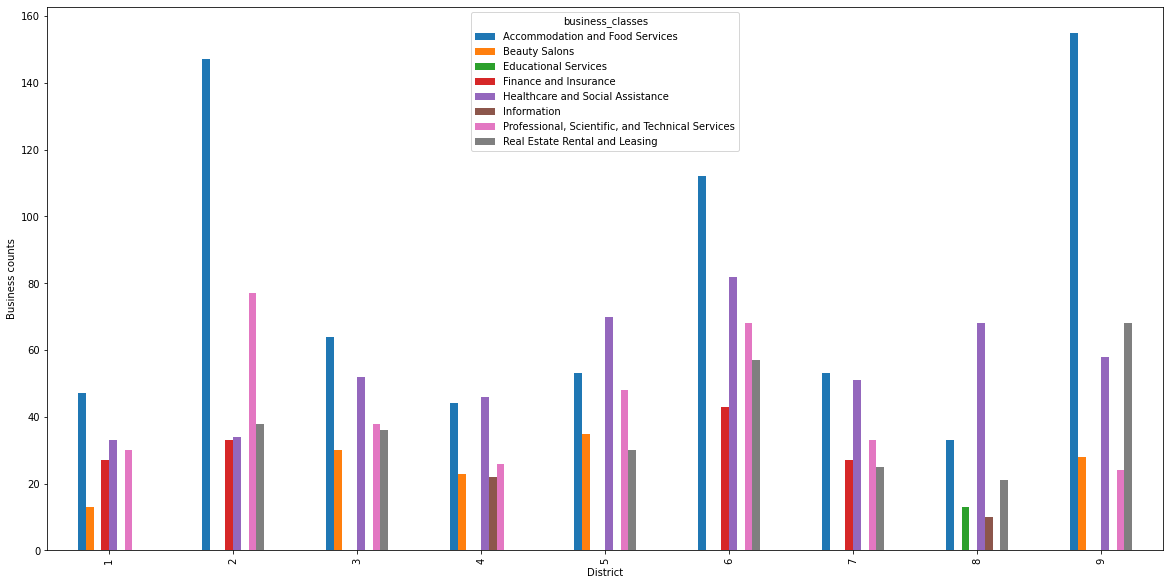

In [ ]:
df_c = df[['business_classes', 'District']]
df_c['counts'] = 1


df_s1 = df_c[df_c['District'] == 1].groupby(['business_classes'],as_index=False)['counts'].count().nlargest(5, 'counts')
df_s1['District'] = 1

for i in range(2,10):
   df_s = df_c[df_c['District'] == i].groupby(['business_classes'],as_index=False)['counts'].count().nlargest(5, 'counts')
   df_s['District'] = i
   df_s1 = pd.concat([df_s1, df_s], axis=0)
   
df_s1.reset_index(drop = True, inplace = True)

df_pivot = pd.pivot_table(
    df_s1, 
    values="counts",
    index="District",
    columns="business_classes", 
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(20, 10)
ax.set_ylabel("Business counts")

In [ ]:
df_s1['business_classes'].unique()

array(['Accommodation and Food Services',
       'Healthcare and Social Assistance',
       'Professional, Scientific, and Technical Services',
       'Finance and Insurance', 'Beauty Salons',
       'Real Estate Rental and Leasing', 'Information',
       'Educational Services'], dtype=object)

Text(0, 0.5, 'Business counts')

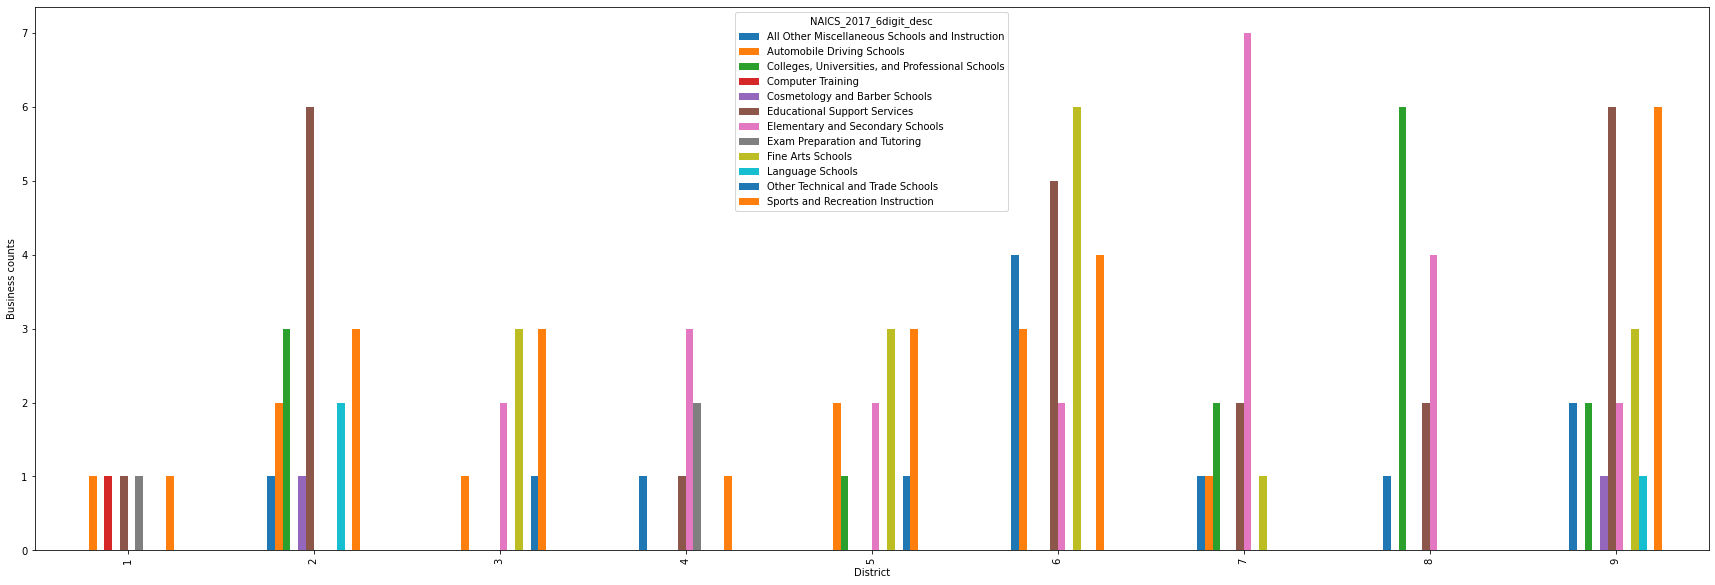

In [ ]:
df_ed = df[df['NAICS_2017_2digit_desc'] == 'Educational Services']
df_ed = df_ed[['NAICS_2017_6digit_desc','District']]
df_ed['counts'] = 1


df_ed1 = df_ed[df_ed['District'] == 1].groupby(['NAICS_2017_6digit_desc'],as_index=False)['counts'].count()
df_ed1['District'] = 1

for i in range(2,10):
   df_s = df_ed[df_ed['District'] == i].groupby(['NAICS_2017_6digit_desc'],as_index=False)['counts'].count()
   df_s['District'] = i
   df_ed1 = pd.concat([df_ed1, df_s], axis=0)
   
df_ed1.reset_index(drop = True, inplace = True)

df_pivot = pd.pivot_table(
    df_ed1, 
    values="counts",
    index="District",
    columns='NAICS_2017_6digit_desc', 
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(30, 10)
ax.set_ylabel("Business counts")

Text(0, 0.5, 'Business counts')

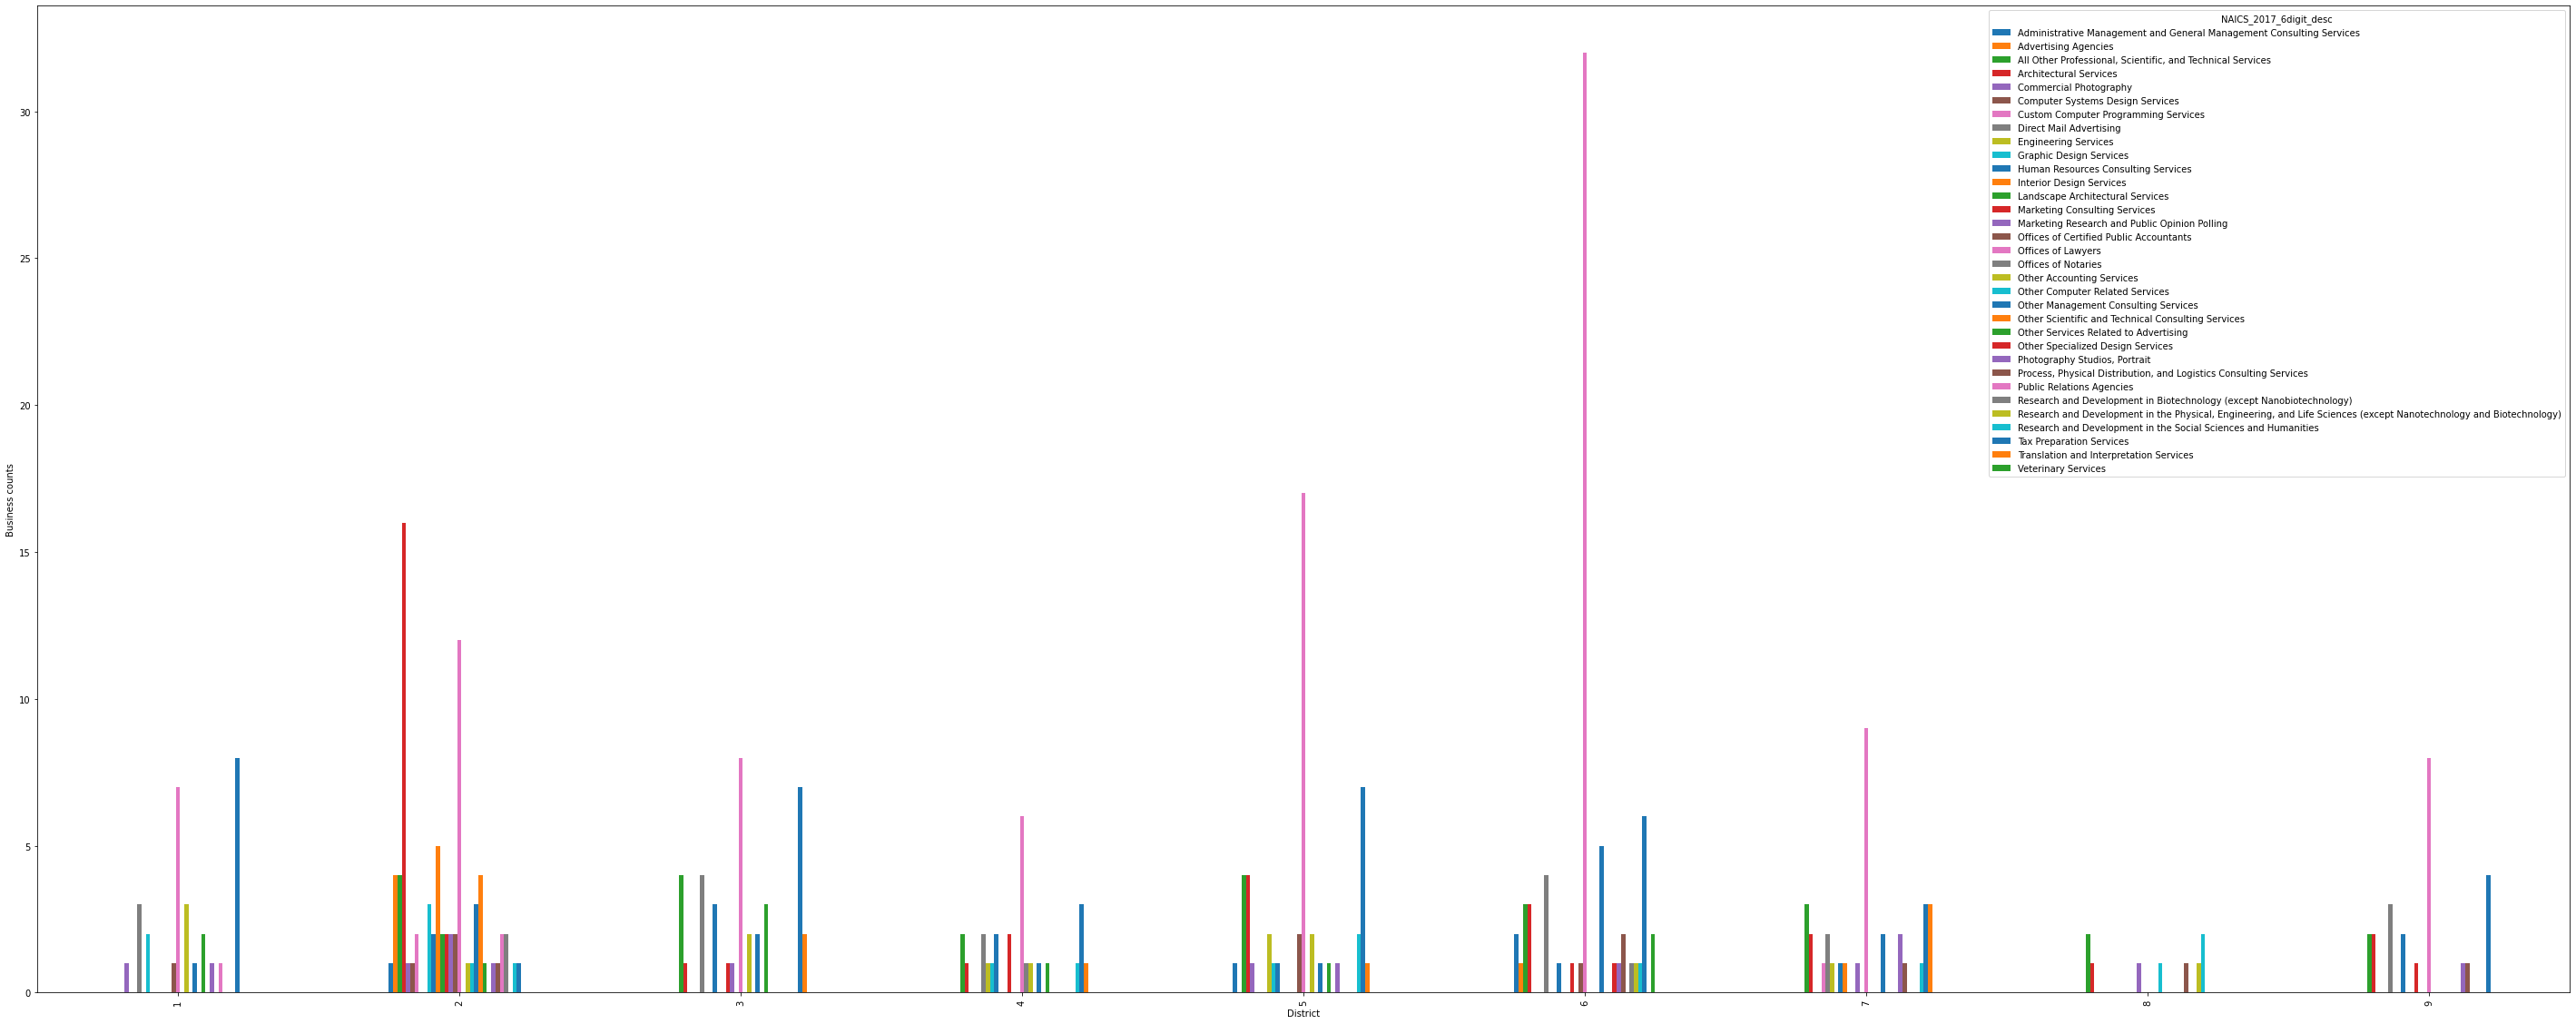

In [ ]:
df_ts = df[df['NAICS_2017_2digit_desc'] == 'Professional, Scientific, and Technical Services']
df_ts = df_ts[['NAICS_2017_6digit_desc','District']]
df_ts['counts'] = 1


df_ts1 = df_ts[df_ts['District'] == 1].groupby(['NAICS_2017_6digit_desc'],as_index=False)['counts'].count()
df_ts1['District'] = 1

for i in range(2,10):
   df_s = df_ts[df_ts['District'] == i].groupby(['NAICS_2017_6digit_desc'],as_index=False)['counts'].count()
   df_s['District'] = i
   df_ts1 = pd.concat([df_ts1, df_s], axis=0)
   
df_ts1.reset_index(drop = True, inplace = True)

df_ts1[df_ts1['counts'] != 1]
df_pivot = pd.pivot_table(
    df_ts1, 
    values="counts",
    index="District",
    columns='NAICS_2017_6digit_desc', 
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(50, 20)
ax.set_ylabel("Business counts")

Text(0, 0.5, 'Business counts')

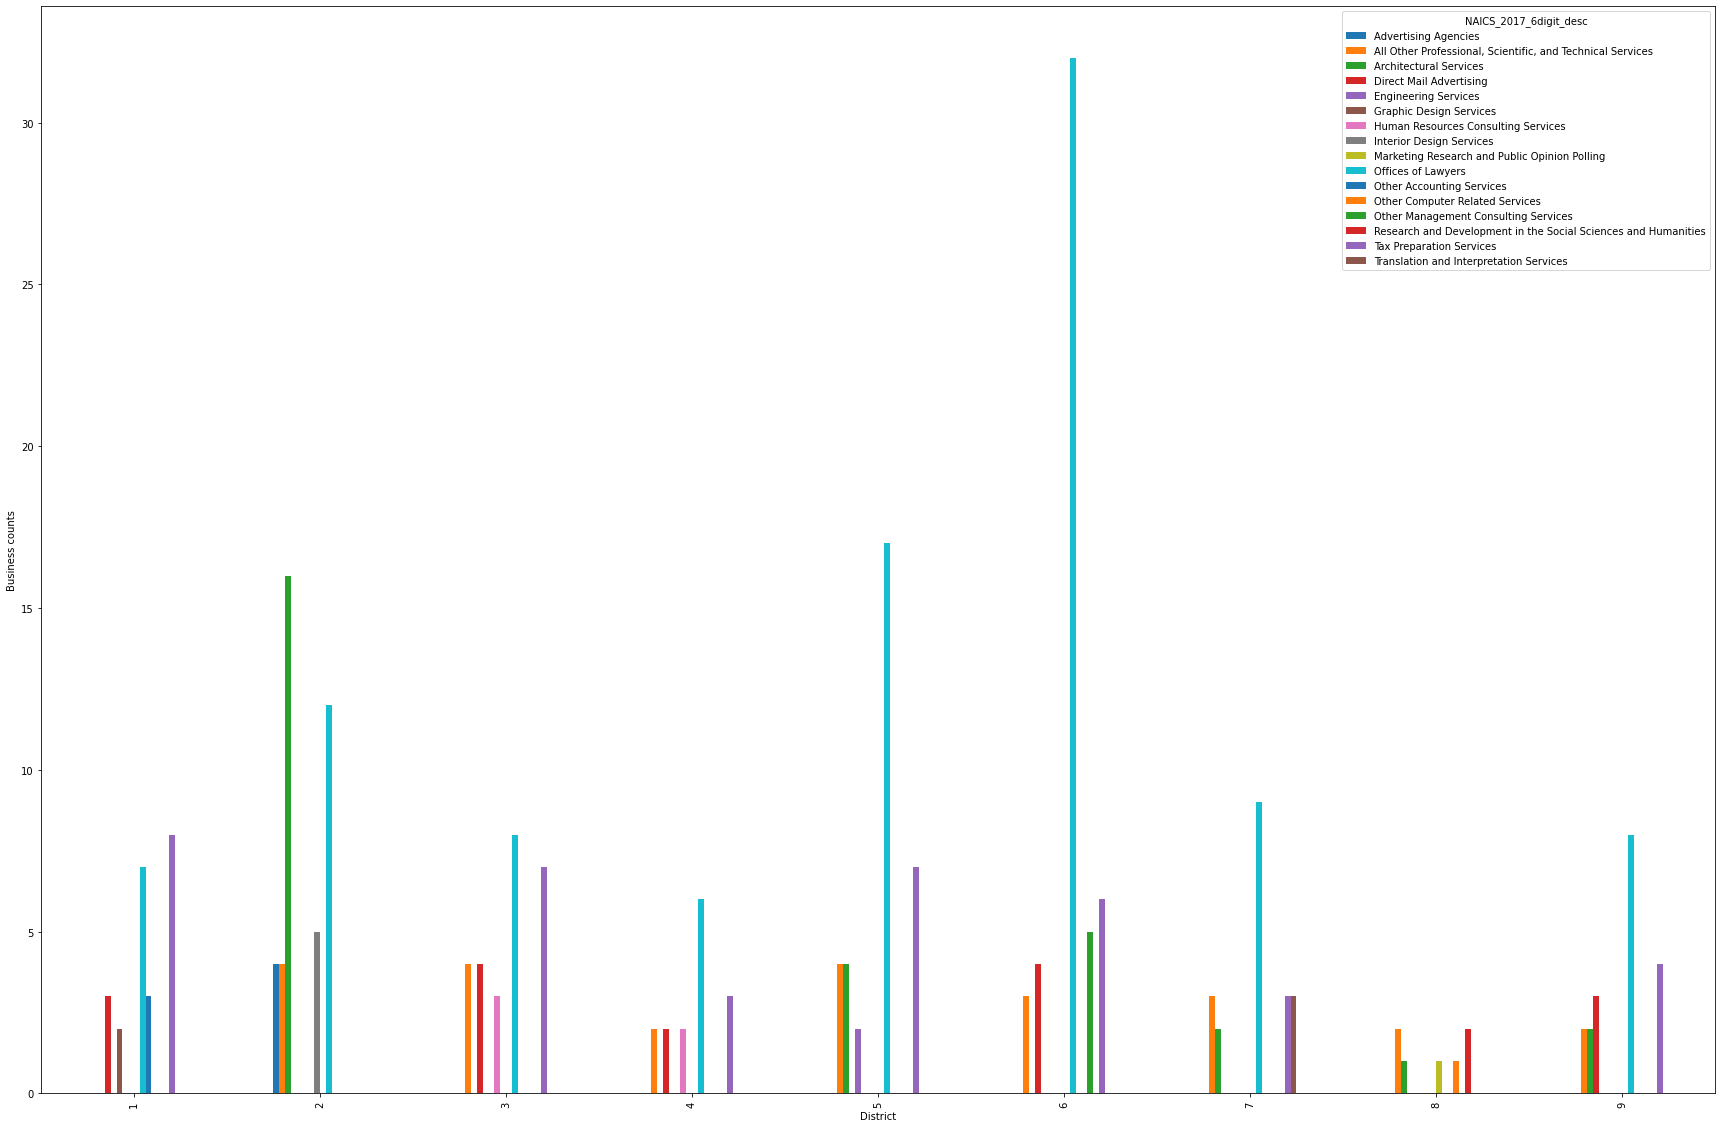

In [ ]:
df_ts = df[df['NAICS_2017_2digit_desc'] == 'Professional, Scientific, and Technical Services']
df_ts = df_ts[['NAICS_2017_6digit_desc','District']]
df_ts['counts'] = 1


df_ts1 = df_ts[df_ts['District'] == 1].groupby(['NAICS_2017_6digit_desc'],as_index=False)['counts'].count().nlargest(5, 'counts')
df_ts1['District'] = 1

for i in range(2,10):
   df_s = df_ts[df_ts['District'] == i].groupby(['NAICS_2017_6digit_desc'],as_index=False)['counts'].count().nlargest(5, 'counts')
   df_s['District'] = i
   df_ts1 = pd.concat([df_ts1, df_s], axis=0)
   
df_ts1.reset_index(drop = True, inplace = True)

df_ts1[df_ts1['counts'] != 1]
df_pivot = pd.pivot_table(
    df_ts1, 
    values="counts",
    index="District",
    columns='NAICS_2017_6digit_desc', 
)

ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(30, 20)
ax.set_ylabel("Business counts")

In [ ]:
dis1_business = df_within1['business_classes'].unique()
busi_dist1 = df_within1['business_classes'].value_counts()
most_1 = busi_dist1[0:5]

dis2_business = df_within2['business_classes'].unique()
busi_dist2 = df_within2['business_classes'].value_counts()
most_2 = busi_dist2[0:5]

dis3_business = df_within3['business_classes'].unique()
busi_dist3 = df_within3['business_classes'].value_counts()
most_3 = busi_dist3[0:5]

dis4_business = df_within4['business_classes'].unique()
busi_dist4 = df_within4['business_classes'].value_counts()
most_4 = busi_dist4[0:5]
print(most_4)

dis5_business = df_within5['business_classes'].unique()
busi_dist5 = df_within5['business_classes'].value_counts()
most_5 = busi_dist5[0:5]

dis6_business = df_within6['business_classes'].unique()
busi_dist6 = df_within6['business_classes'].value_counts()
most_6 = busi_dist6[0:5]

dis7_business = df_within7['business_classes'].unique()
busi_dist7 = df_within7['business_classes'].value_counts()
most_7 = busi_dist7[0:5]

dis8_business = df_within8['business_classes'].unique()
busi_dist8 = df_within8['business_classes'].value_counts()
most_8 = busi_dist8[0:5]

dis9_business = df_within9['business_classes'].unique()
busi_dist9 = df_within9['business_classes'].value_counts()
most_9 = busi_dist9[0:5]

Healthcare and Social Assistance                    46
Accommodation and Food Services                     44
Professional, Scientific, and Technical Services    26
Beauty Salons                                       23
Information                                         22
Name: business_classes, dtype: int64


In [ ]:
print(sum(busi_dist1))
print(sum(busi_dist2))
print(sum(busi_dist3))
print(sum(busi_dist4))
print(sum(busi_dist5))
print(sum(busi_dist6))
print(sum(busi_dist7))
print(sum(busi_dist8))
print(sum(busi_dist9))
print(sum(busi_dist1) + sum(busi_dist2) + sum(busi_dist3) + sum(busi_dist4) + sum(busi_dist5) + sum(busi_dist6) + sum(busi_dist7) + sum(busi_dist8) + sum(busi_dist9))

292
652
505
388
538
814
418
229
631
4467


In [ ]:
d1 = 76830
d2 = 77466
d3 = 73285
d4 = 72917
d5 = 75436
d6 = 76523
d7 = 72147
d8 = 76370
d9 = 74673
print(d1+d2+d3+d4+d5+d6+d7+d8+d9)
print(675647/4467)
print()
print(d1/sum(busi_dist1))
print(d2/sum(busi_dist2))
print(d3/sum(busi_dist3))
print(d4/sum(busi_dist4))
print(d5/sum(busi_dist5))
print(d6/sum(busi_dist6))
print(d7/sum(busi_dist7))
print(d8/sum(busi_dist8))
print(d9/sum(busi_dist9))

675647
151.2529661965525

263.1164383561644
118.81288343558282
145.11881188118812
187.93041237113403
140.21561338289962
94.0085995085995
172.60047846889952
333.49344978165936
118.34072900158479


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
X = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

X_axis = np.arange(len(X))


In [ ]:
#get the missing business in district4
mis_business = list(set(all_business)-set(dis4_business))
del mis_business[1]
del mis_business[3]
missing = df.loc[df['business_classes'].isin(mis_business)]
mis_busi = missing['business_classes'].unique()
mis_busi = missing['business_classes'].value_counts()
print(missing[['District', 'business_classes']])
print(mis_busi)

      District                            business_classes
213          9     Management of Companies and Enterprises
1055         2     Management of Companies and Enterprises
1171         2  Agriculture, Forestry, Fishing and Hunting
2239         6                                      Mining
Management of Companies and Enterprises       2
Agriculture, Forestry, Fishing and Hunting    1
Mining                                        1
Name: business_classes, dtype: int64


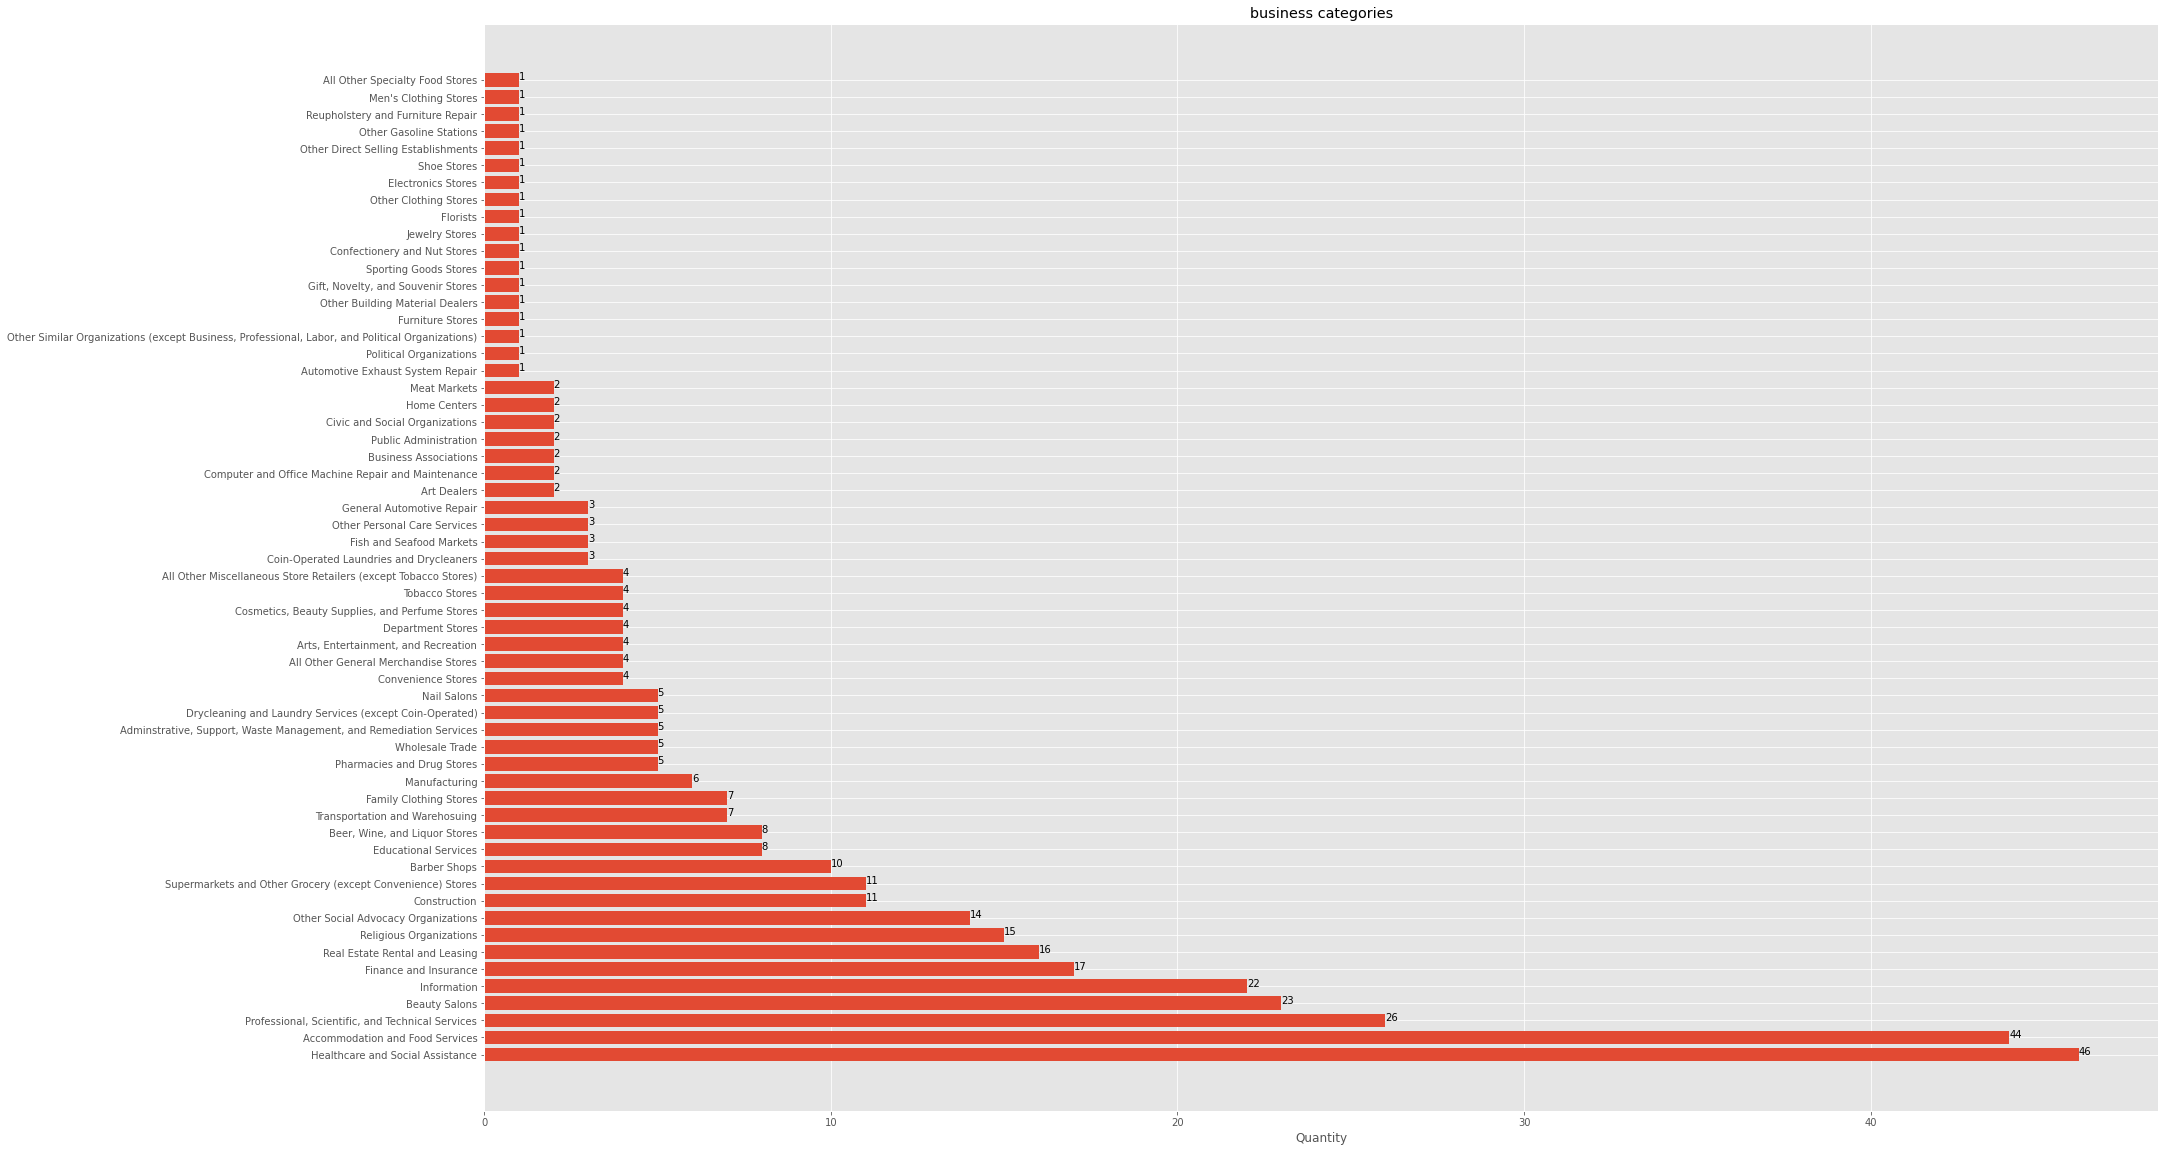

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(30,20))
plt.barh(busi_dist4.index, busi_dist4.values)

for index, value in enumerate(busi_dist4.values):
    plt.text(value, index, str(value))
#plot Retail Trade and Other services from 6digits, others from 2digits
plt.title('business categories')
plt.xlabel('Quantity')
plt.show()

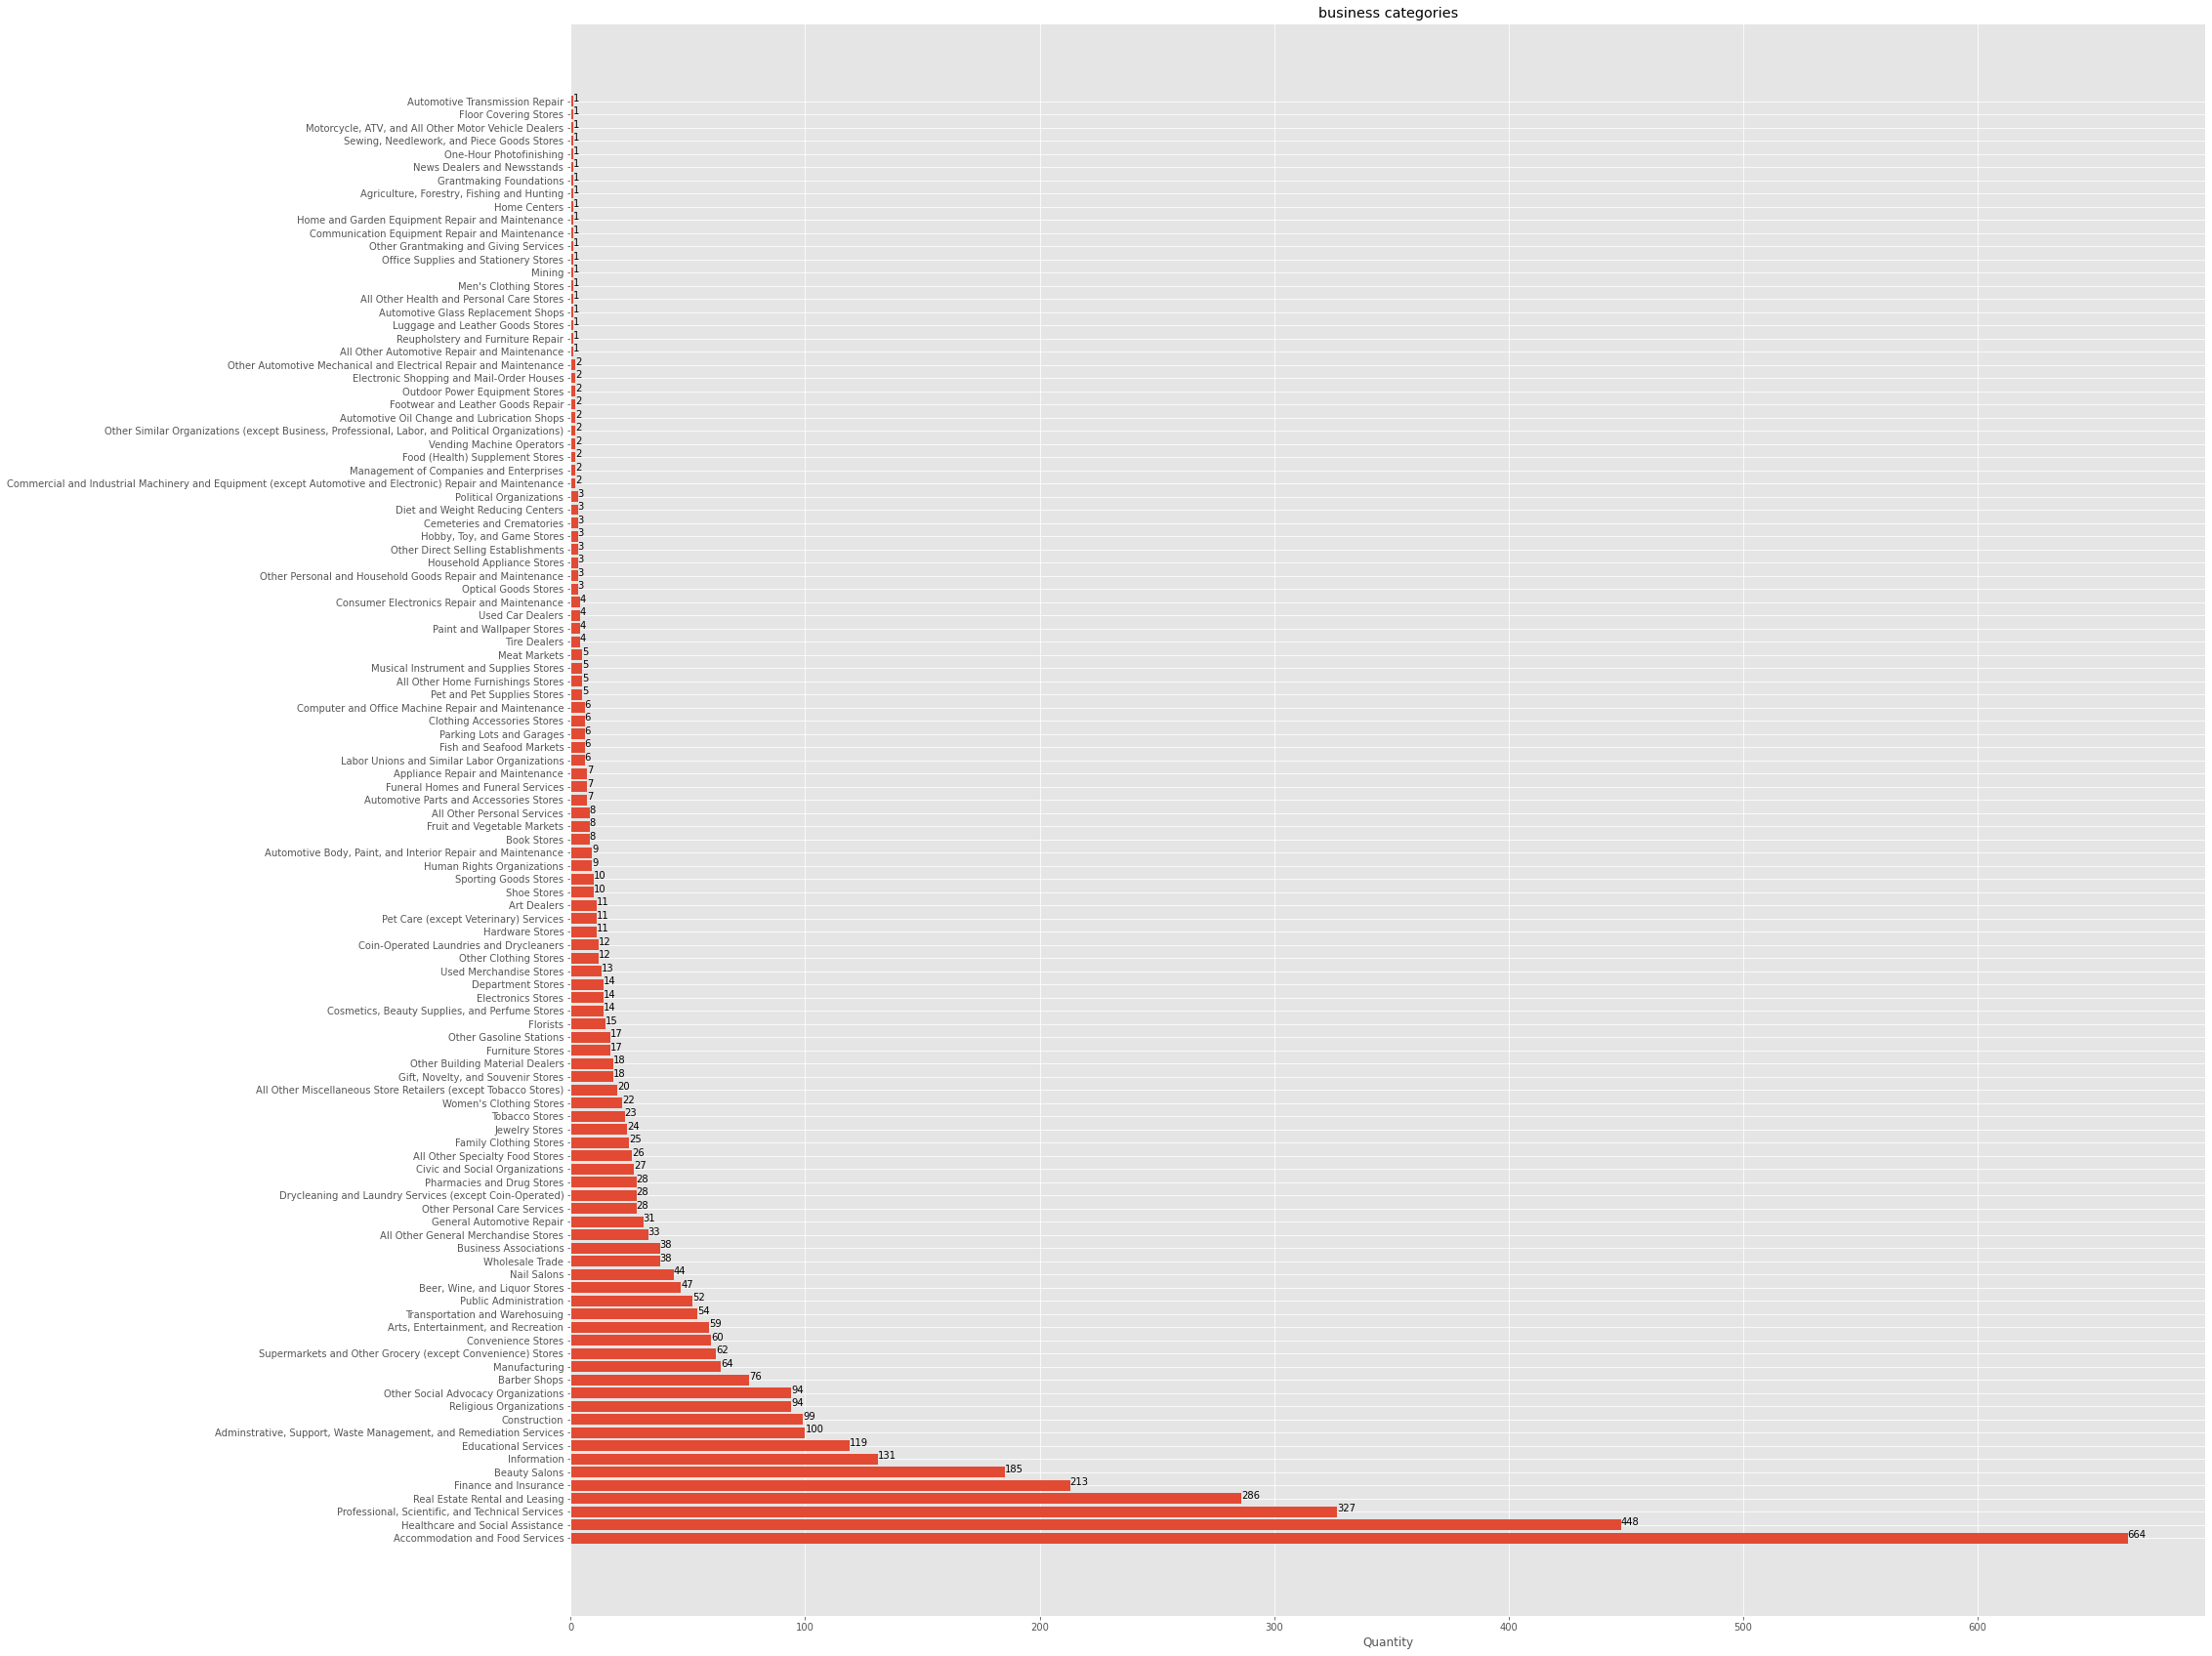

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(30,30))
plt.barh(others_busi.index, others_busi.values)
#plt.barh(['Agriculture, Forestry, Fishing and Hunting', 'Management of Companies and Enterprises', 'Mining'], others_busi.values)

for index, value in enumerate(others_busi.values):
    plt.text(value, index, str(value))
#plot Retail Trade and Other services from 6digits, others from 2digits
plt.title('business categories')
plt.xlabel('Quantity')
plt.show()

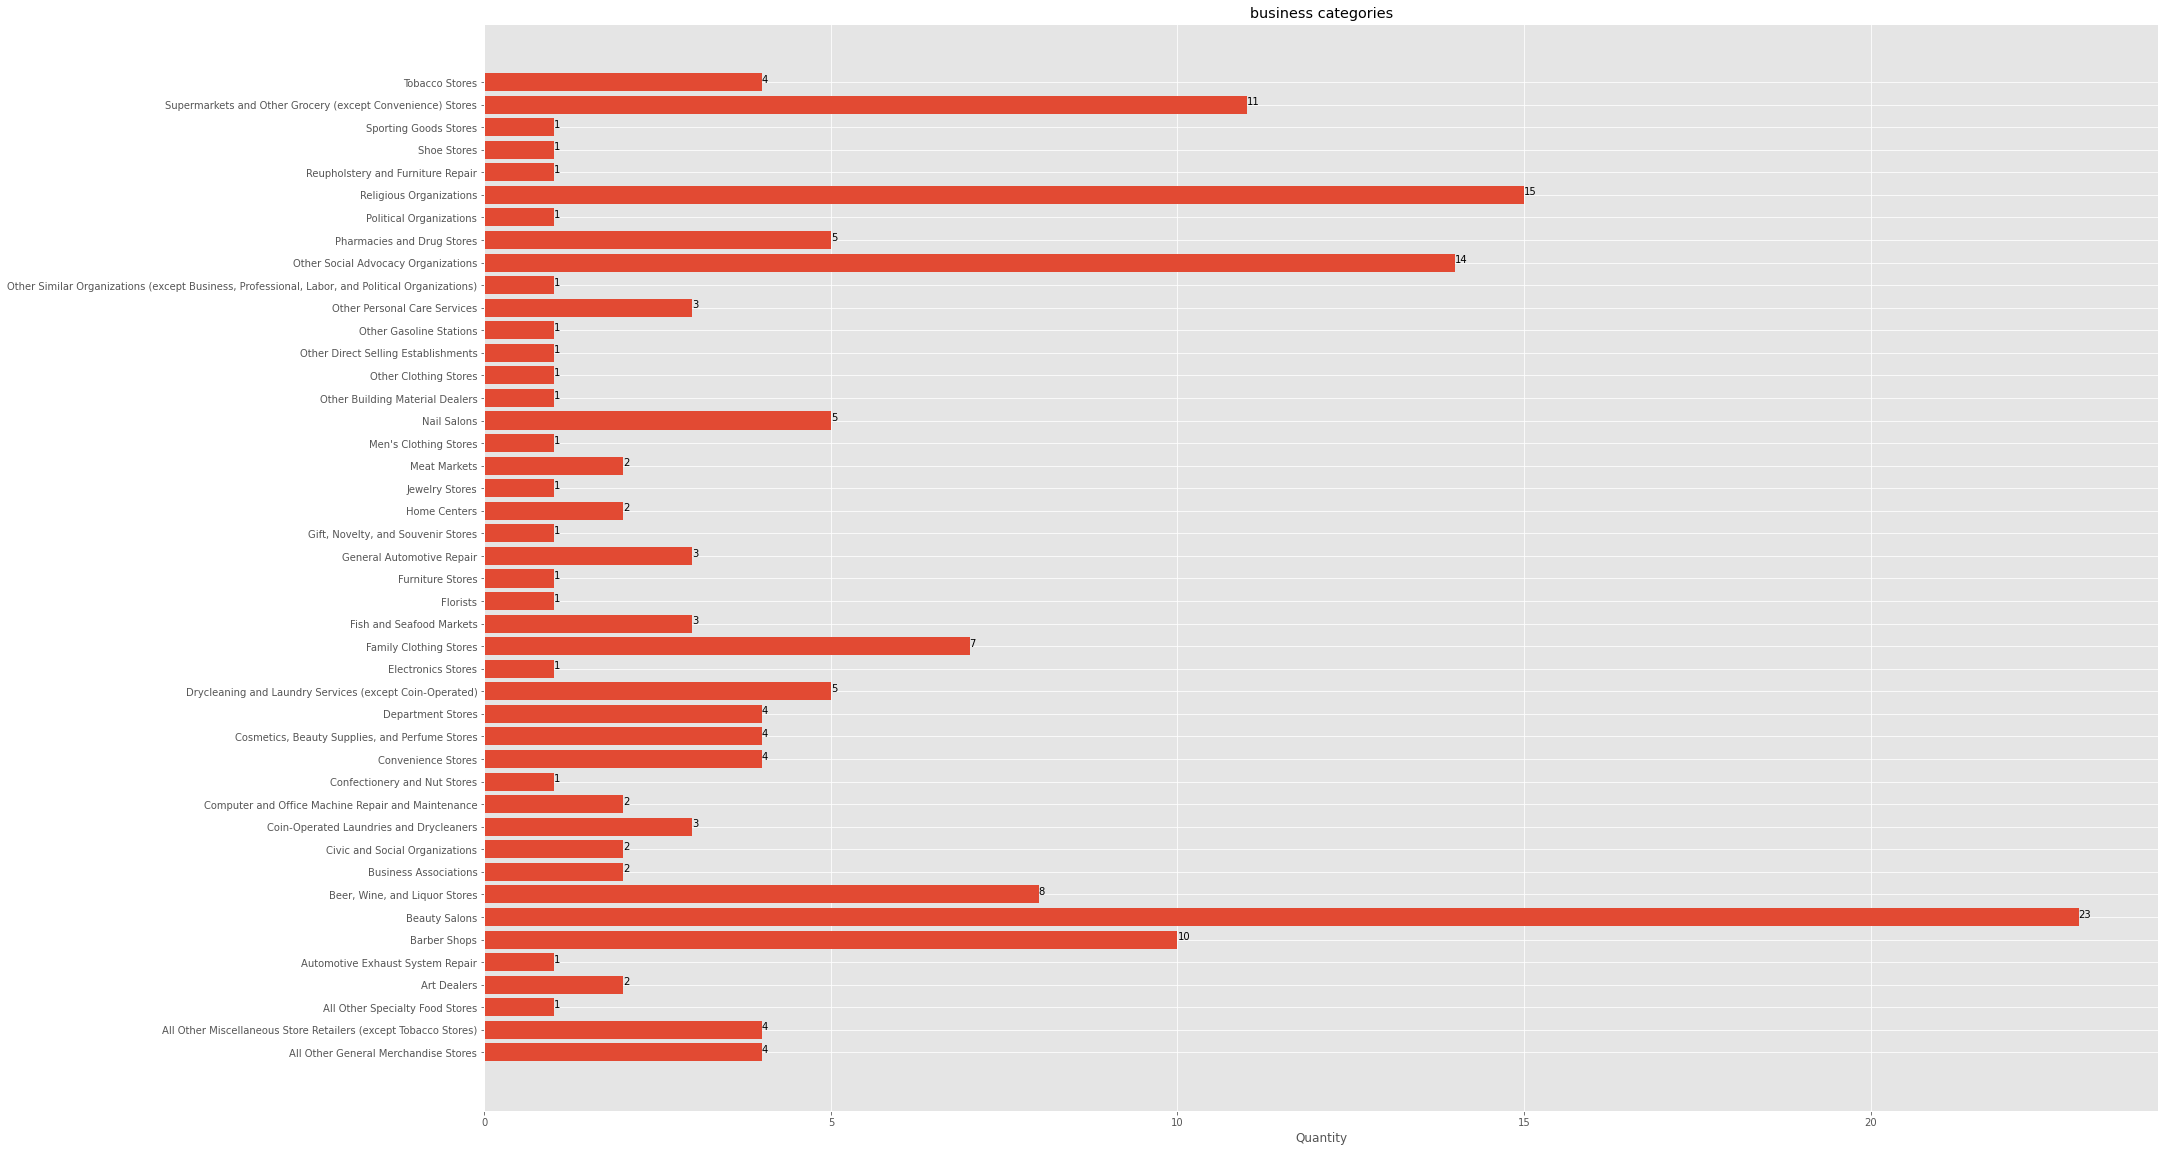

In [ ]:
dis4_within4_1 = df_within4.loc[df_within4['business_label'] == 1]
busi_dist4_1 = dis4_within4_1.groupby('business_classes')['...1'].count()


plt.style.use('ggplot')
plt.figure(figsize=(30,20))
plt.barh(busi_dist4_1.index, busi_dist4_1.values)

for index, value in enumerate(busi_dist4_1.values):
    plt.text(value, index, str(value))
#only plot Retail Trade and Other services
plt.title('business categories')
plt.xlabel('Quantity')
plt.show()

In [ ]:
import folium
import webbrowser as wb
#get two centroid business of dist4
centroid1 = [42.3052965,-71.0797222]
centroid2 = [42.2984378,-71.0605241]

#Accommodation and Food Services class has the most quantity
df_fs = df_within4.loc[df_within4['business_classes'] == 'Accommodation and Food Services']

map_1=folium.Map(location=[(centroid1[0]+centroid2[0])/2, (centroid1[1]+centroid2[1])/2],zoom_start=15)
df_fs.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='green') ).add_to(map_1),axis=1)

folium.Circle(location=[42.3052965,-71.0797222],radius=1000,color = 'green', fill=True).add_to(map_1)
folium.Circle(location=[42.2984378,-71.0605241],radius=1000,color = 'blue', fill=True).add_to(map_1)
map_1

In [ ]:
import haversine as hs

df_within4_d = df_within4.loc[:,['latitude','longitude','business_classes']]

In [ ]:
#count business in specific area, if one business more than 10 stores, it will be assign overlap
def count_overlap(df):
  dist_c1 = []
  dist_c2 = []
  df_ind = df['business_classes'].values[0]
  lat = df['latitude'].values
  lng = df['longitude'].values
  for i in range(len(lat)):
    loc = [lat[i],lng[i]]
    dist_1 = hs.haversine(centroid1,loc)
    dist_2 = hs.haversine(centroid2,loc)
    if dist_1 <= 1:
      dist_c1.append(dist_1)
    if dist_2 <= 1:
      dist_c2.append(dist_2)
  if len(dist_c1) >= 10:
    print(df_ind + " overlap in C1")
  if len(dist_c2) >= 10:
    print(df_ind +" overlap in C2")

#loop every business classes
df_busi = df_within4_d['business_classes'].value_counts()

for m in range(len(df_busi.index)):
  count_df = df_within4_d.loc[df_within4_d['business_classes'] == df_busi.index[m]]
  count_overlap(count_df)
#the result shows that these business overlap in which area.

In [ ]:

df_HS = df_within4_d[(df_within4_d['business_classes'] == 'Healthcare and Social Assistance')]
df_AF = df_within4_d[(df_within4_d['business_classes'] == 'Accommodation and Food Services')]
df_BS = df_within4_d[(df_within4_d['business_classes'] == 'Beauty Salons')]
df_IN = df_within4_d[(df_within4_d['business_classes'] == 'Information')]
df_RO = df_within4_d[(df_within4_d['business_classes'] == 'Religious Organizations')]
df_PS = df_within4_d[(df_within4_d['business_classes'] == 'Professional, Scientific, and Technical Services')]
df_FI = df_within4_d[(df_within4_d['business_classes'] == 'Finance and Insurance')]


map_2=folium.Map(location=[(centroid1[0]+centroid2[0])/2, (centroid1[1]+centroid2[1])/2],zoom_start=15)
df_HS.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='green') ).add_to(map_2),axis=1)
df_AF.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='blue') ).add_to(map_2),axis=1)
df_BS.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='red') ).add_to(map_2),axis=1)
df_IN.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='purple') ).add_to(map_2),axis=1)
df_RO.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='gray') ).add_to(map_2),axis=1)
df_PS.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='orange') ).add_to(map_2),axis=1)
df_FI.apply(lambda row:folium.Marker(
    location=[row["latitude"], row["longitude"]],
    popup=row["business_classes"],
    icon=folium.map.Icon(color='black') ).add_to(map_2),axis=1)


folium.Circle(location=[42.3052965,-71.0797222],radius=1000,color = 'green', fill=True).add_to(map_2)
folium.Circle(location=[42.2984378,-71.0605241],radius=1000,color = 'blue', fill=True).add_to(map_2)
map_2